In [2]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import csv file
df=pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape")

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# #drop unrelated/blank columns
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [8]:
# After Drop unrelated/empty columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
# Amount column has 12 null values just drop it !.
df.dropna(inplace=True)

In [12]:
#check Amount has null values 
#there is no null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
#change DataType of Amout
df["Amount"]=df["Amount"].astype('int64')

In [14]:
#check the DataType of amoout
#df["Amount"].dtypes
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
# Describe DataFrame
# for Whole DF 
# df.describe()
#for specifi Columns :
df["Amount"].describe()


count    11239.000000
mean      9453.610553
std       5222.355168
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64

Exploratory Data Analysis

1. Plot for State Wise Purchase

C:\Users\Satheesh.M\AppData\Local\Temp\ipykernel_13480\1948472616.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='State',data=df,palette="viridis")


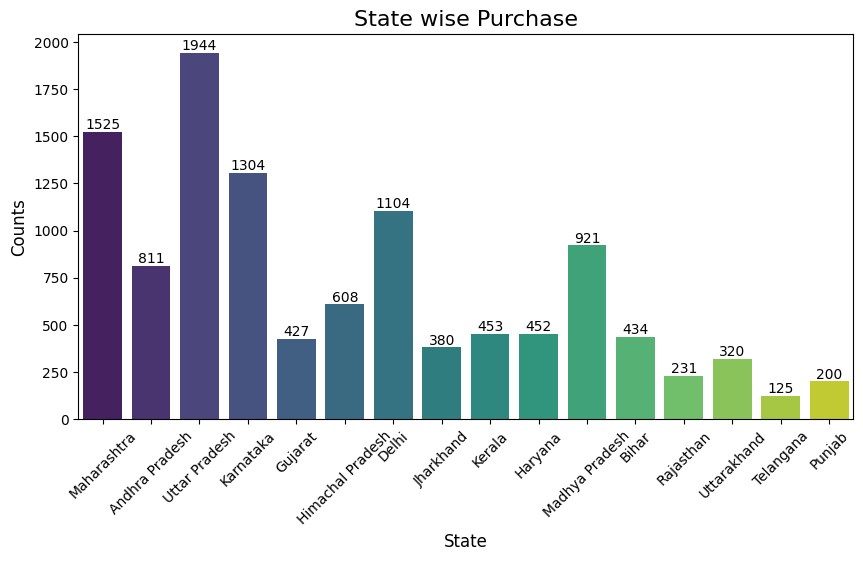

In [16]:
#df["Gender"].value_counts()
plt.figure(figsize=(10, 5)) 
plt.xticks(rotation=45)
plt.title("State wise Purchase", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Counts", fontsize=12)

ax=sns.countplot(x='State',data=df,palette="viridis")
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
sale_by_state=df.groupby(['State'],as_index=False)["Amount"].sum()
sale_by_state

,State,Amount
0,Andhra Pradesh,8037146
1,Bihar,4022757
2,Delhi,11603818
3,Gujarat,3946082
4,Haryana,4220175
5,Himachal Pradesh,4963368
6,Jharkhand,3026456
7,Karnataka,13523540
8,Kerala,3894491
9,Madhya Pradesh,8101142


2. State Wise Total purchase amount

C:\Users\Satheesh.M\AppData\Local\Temp\ipykernel_13480\1456466245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y="State",x="Amount",data=sale_by_state,palette="viridis")


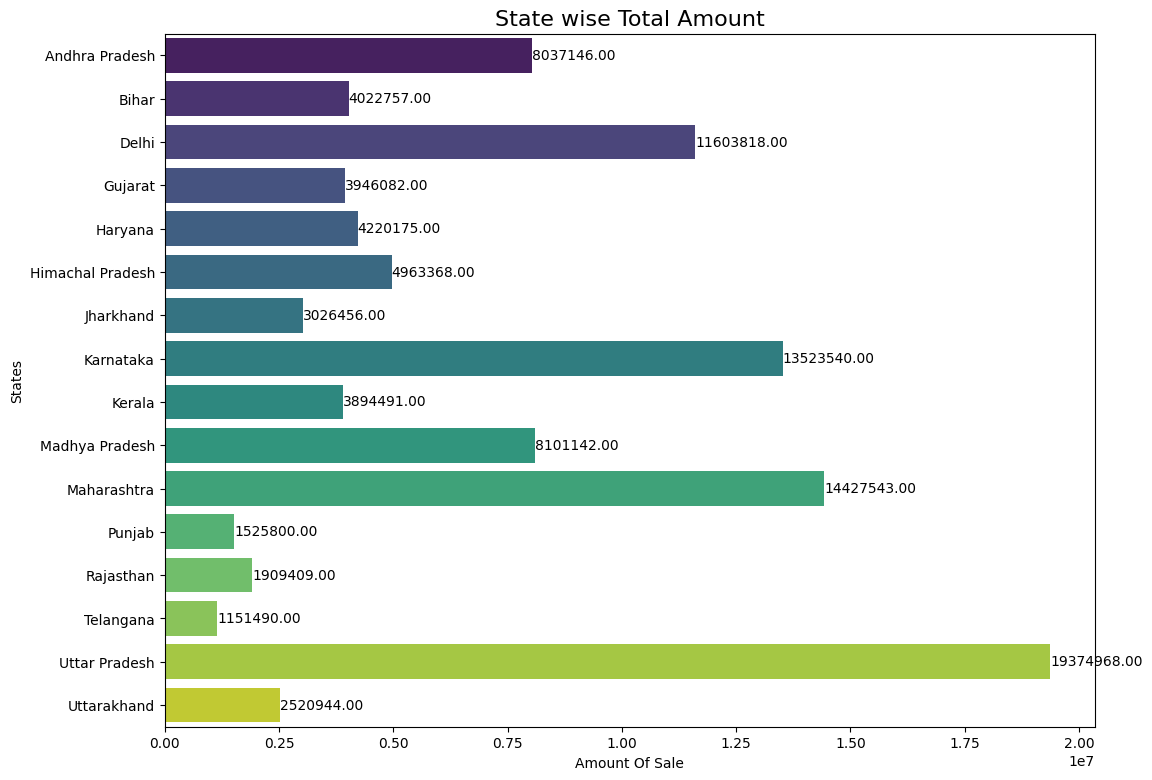

In [18]:
# Plot customization 
plt.figure(figsize=(12, 9)) 
plt.title("State wise Total Amount", fontsize=16)
plt.xlabel("Amount Of Sale")
plt.ylabel("States")

# Plot
ax=sns.barplot(y="State",x="Amount",data=sale_by_state,palette="viridis")
for bars in ax.containers:
    ax.bar_label(bars,fmt="%.2f")
plt.show()

Count by Age Group Men & Women

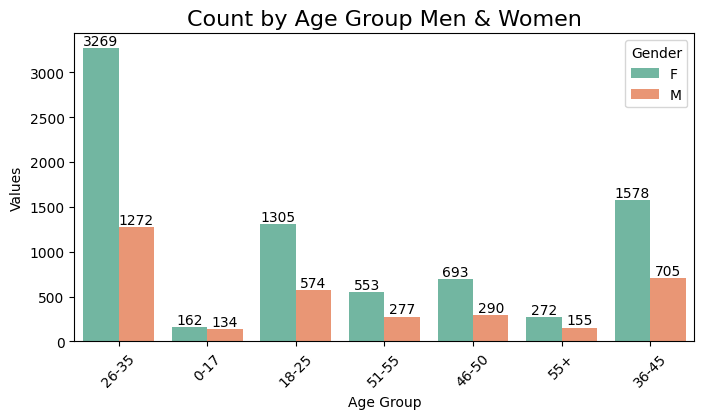

In [19]:
# Plot customization 
plt.figure(figsize=(8,4)) 
plt.xticks(rotation=45)
plt.title("Count by Age Group Men & Women", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Values")

# Bar Plot
ax=sns.countplot(x="Age Group", hue="Gender",data=df,palette="Set2")
for bars in ax.containers:
    ax.bar_label(bars)

In [20]:
sales_by_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum()
sales_by_age

,Age Group,Amount
0,0-17,2699653
1,18-25,17240732
2,26-35,42613442
3,36-45,22144994
4,46-50,9207844
5,51-55,8261477
6,55+,4080987


C:\Users\Satheesh.M\AppData\Local\Temp\ipykernel_13480\1812445054.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="Age Group",y="Amount",data=sales_by_age,palette="muted")


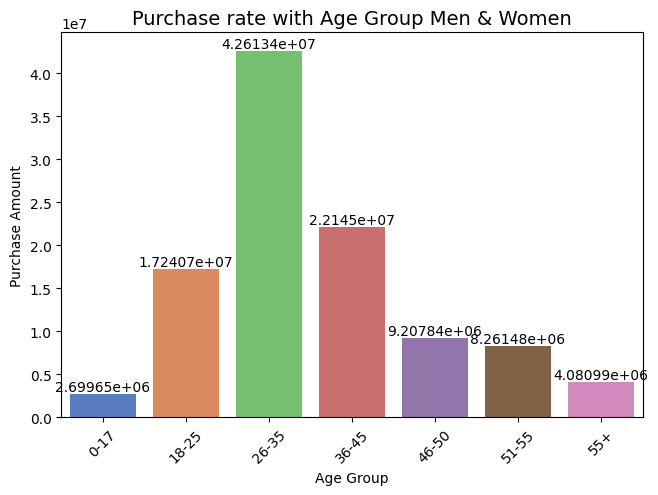

In [21]:
#ax=sns.barplot(x="Age Group",y="Amount",data=sales_by_age)

# Plot customization 
plt.figure(figsize=(7.5,5)) 
plt.xticks(rotation=45)
plt.title("Purchase rate with Age Group Men & Women", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")

# bar Plot
ax=sns.barplot(x="Age Group",y="Amount",data=sales_by_age,palette="muted")
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs

Total number of orders from top 10 states

C:\Users\Satheesh.M\AppData\Local\Temp\ipykernel_13480\1598734365.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="State",y="Orders",data=grp_state,palette="tab10")


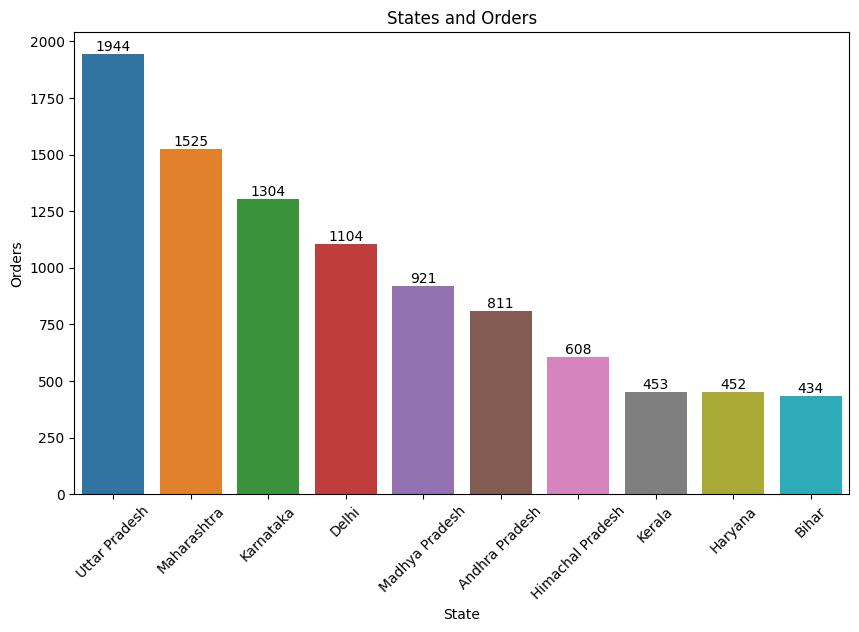

In [22]:
# Plot customization 
plt.figure(figsize=(10, 6)) 
plt.xticks(rotation=45)
plt.title("States and Orders")

#grp_state=df.groupby(['State'],as_index=False)['Orders'].count()

# Data Frame
#Top 10 States  based on orders 
grp_state=df.groupby(['State'],as_index=False)['Orders'].count().sort_values(by="Orders",ascending=False).head(10)
grp_state

# Plot for Top 10 States
ax=sns.barplot(x="State",y="Orders",data=grp_state,palette="tab10")
for bars in ax.containers:
     ax.bar_label(bars)

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

Purchase Amount Order by State 

C:\Users\Satheesh.M\AppData\Local\Temp\ipykernel_13480\2559837245.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y="State",x="Amount",data=grp_state,palette="tab10")


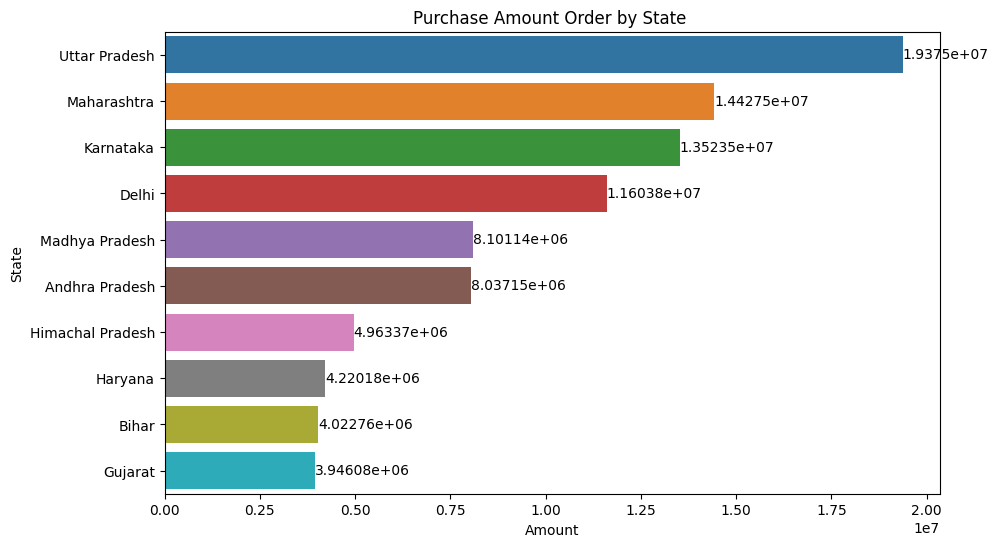

In [23]:
# Plot customization 
plt.figure(figsize=(10, 6)) 
plt.title("Purchase Amount Order by State ")

#D ata Frame
#Top 10 States  based on Amoount 

grp_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False).head(10)
grp_state

# Horizantal Plot 
ax=sns.barplot(y="State",x="Amount",data=grp_state,palette="tab10")
for bars in ax.containers:
     ax.bar_label(bars)

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

GENDER 

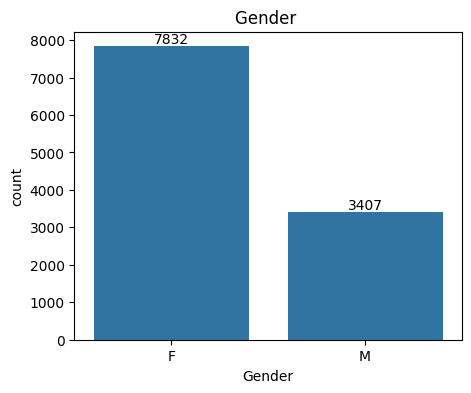

In [24]:
# Plot customization 
plt.figure(figsize=(5, 4)) 
plt.title("Gender ")

# Bar Plot Married Status
ax=sns.countplot(x="Gender",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

Occupation and its Sum of Count

C:\Users\Satheesh.M\AppData\Local\Temp\ipykernel_13480\2455993990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation",data=df,palette="tab10")


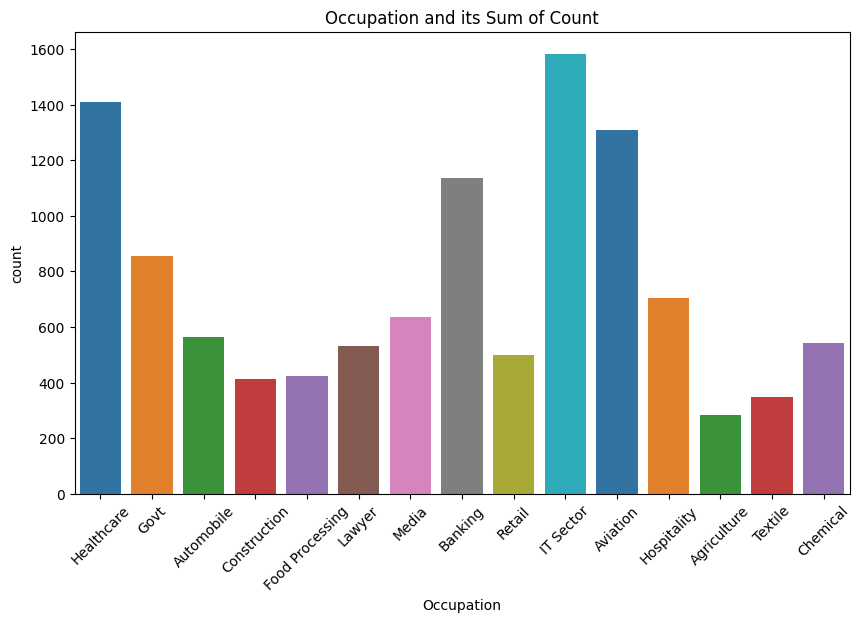

In [25]:
# Plot customization 
plt.figure(figsize=(10, 6)) 
plt.xticks(rotation=45)
plt.title("Occupation and its Sum of Count")

# Plot
sns.countplot(x="Occupation",data=df,palette="tab10")
plt.show()

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation secto

Product Category

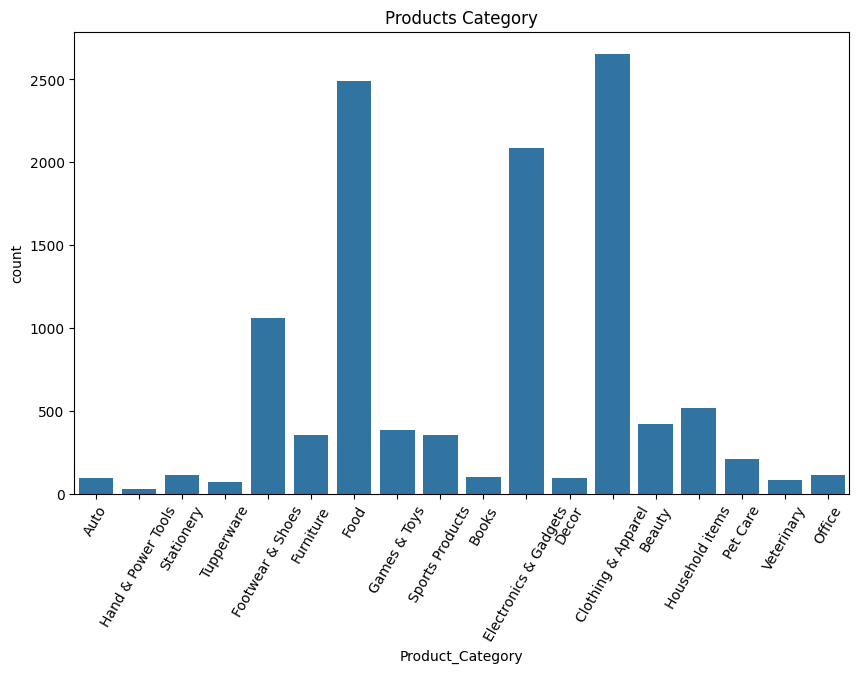

In [26]:
# Plot customization 
plt.figure(figsize=(10, 6)) 
plt.xticks(rotation=60)
plt.title("Products Category")

# Plot
sns.countplot(x="Product_Category",data=df)
plt.show()


From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

Product Category and its Purchased Amount

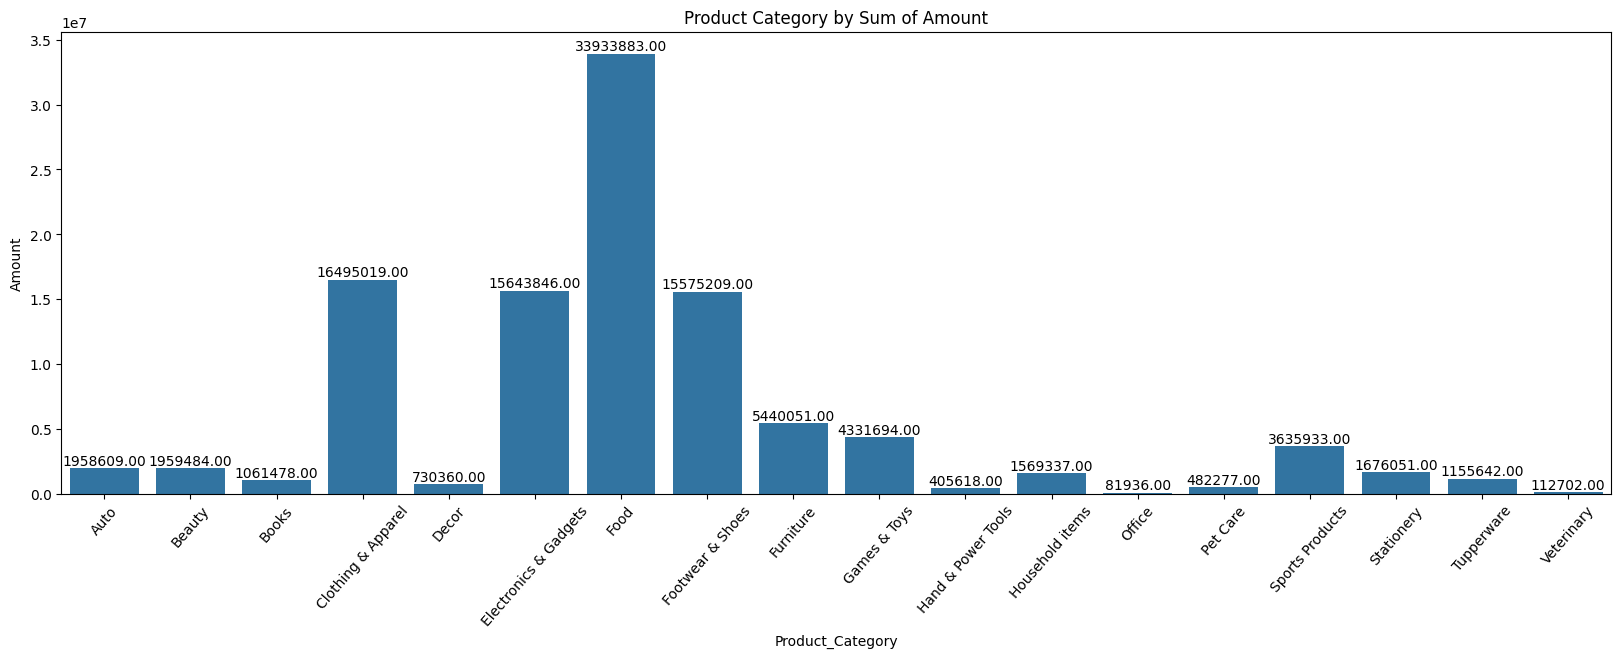

In [27]:
# Plot customization 
plt.figure(figsize=(20, 6)) 
plt.xticks(rotation=49)
plt.title("Product Category by Sum of Amount")

# Data Frame 
food_amount=df.groupby(['Product_Category'],as_index=False)['Amount'].sum()

# Bar plot
ax=sns.barplot(data=food_amount,x="Product_Category",y="Amount")
for bars in ax.containers:
    ax.bar_label(bars,fmt="%.2f")


From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

Top 10 Customers

C:\Users\Satheesh.M\AppData\Local\Temp\ipykernel_13480\2667454469.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="User_ID",y="Orders",data=id,palette="coolwarm")


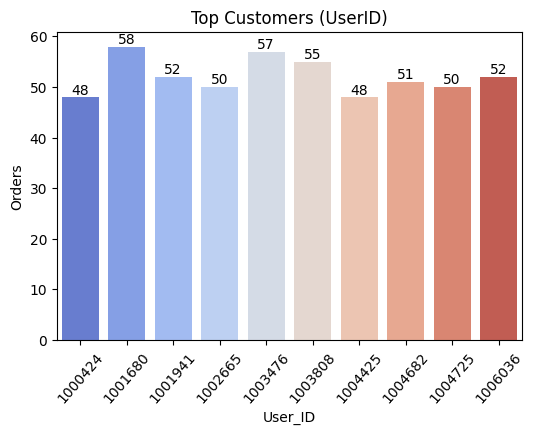

In [28]:
# Plot customization 
plt.figure(figsize=(6, 4)) 
plt.xticks(rotation=49)
plt.title("Top Customers (UserID)")

# DataFrame
id=df.groupby(['User_ID'],as_index=False)['Orders'].sum().sort_values(by="Orders",ascending=False).head(10)

# Plot
ax=sns.barplot(x="User_ID",y="Orders",data=id,palette="coolwarm")
for bars in ax.containers:
    ax.bar_label(bars)


In [29]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
